# Weather Dashboard with Data Visualization

In this notebook, we will fetch weather data for multiple cities using an API, parse the data, and create a dashboard with visualizations such as temperature and humidity trends. The task includes error handling and rate limiting between requests.

In [1]:
import requests
import matplotlib.pyplot as plt
import time

# Function to fetch weather data for a given city
def fetch_weather_data(city, api_key):
    url = f"http://api.openweathermap.org/data/2.5/weather?q={city}&appid={api_key}&units=metric"
    try:
        response = requests.get(url)
        response.raise_for_status()  # Check for HTTP errors
        data = response.json()
        return {
            'city': data['name'],
            'temperature': data['main']['temp'],
            'humidity': data['main']['humidity'],
            'wind_speed': data['wind']['speed'],
            'weather_description': data['weather'][0]['description']
        }
    except requests.exceptions.HTTPError as errh:
        print(f"HTTP Error: {errh}")
    except requests.exceptions.RequestException as err:
        print(f"Request Error: {err}")
    return None


In [2]:
# List of cities for which we will fetch weather data
cities = ["London", "Tokyo", "Sydney", "New York", "Paris"]
api_key = "f365077eeec2ffd8f5329e0d5bdba043"  # Replace with your actual API key

In [3]:
# Fetch the weather data for each city
weather_data = []
for city in cities:
    data = fetch_weather_data(city, api_key)
    if data:
        weather_data.append(data)
    time.sleep(1)  # Rate limiting - wait 1 second between requests

In [4]:
# Data extraction for visualization
cities_names = [data['city'] for data in weather_data]
temperatures = [data['temperature'] for data in weather_data]
humidity = [data['humidity'] for data in weather_data]

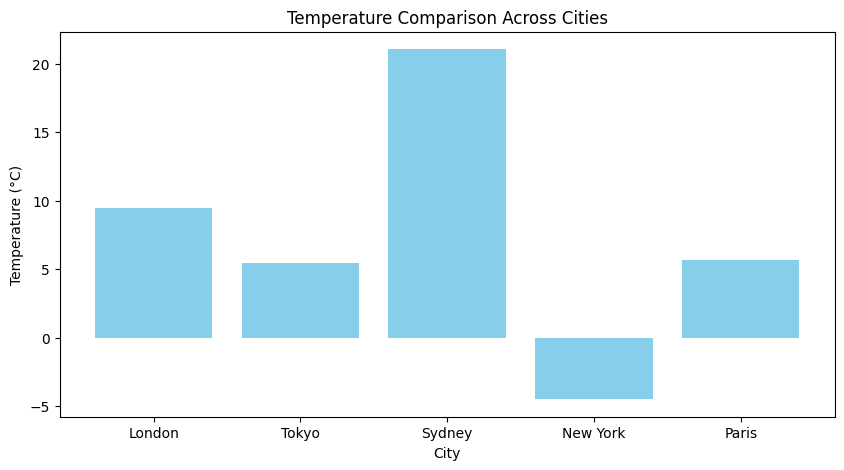

In [5]:
# Plot temperature data
plt.figure(figsize=(10, 5))
plt.bar(cities_names, temperatures, color='skyblue')
plt.title("Temperature Comparison Across Cities")
plt.xlabel("City")
plt.ylabel("Temperature (°C)")
plt.show()

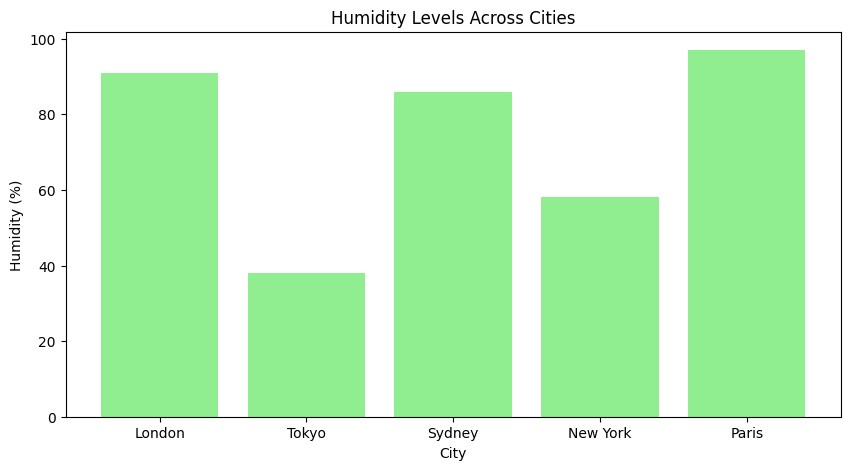

In [6]:
# Plot humidity data
plt.figure(figsize=(10, 5))
plt.bar(cities_names, humidity, color='lightgreen')
plt.title("Humidity Levels Across Cities")
plt.xlabel("City")
plt.ylabel("Humidity (%)")
plt.show()